# Forecasting the Price of Refined sugar in the Philippines using ARIMAX model

## What is Arimax model?

ARIMAX is an extension of ARIMA model with the inclusion of the Exogeneous variables. Those exogeneous variable make the forecasting more accurate as oppose to the traditional ARIMA model.

### Components of ARIMA model
**AR** - The AutoRegressive component checks the previous data on how it affects the current data.

**MA** - The Moving Average component checks the errors of the previous data and how it affects the current data.

**I** - The Integrated is responsible for differencing the data to achieve stationarity.

#### What is Differencing?
Differencing is the Process of taking the difference of the current and previous data.
example jan = 10, feb = 12, mar = 9, apr = 11.
difference(feb) = jan - feb 

Since there is no previous value in January, it will be empty


#### What is Stationarity?
Stationarity is when the mean and variance of the time series is constant. One way to check for stationarity is through the Augmented Dickey-Fuller test. The ADF test check the existence of unit root, if it exist the time series is not stationary. Additionally, the p-value must be less than 0.05 in order to reject the existence of unit root.



The objective is to forecast the Price of refined sugar in the Phillippines, subject to the following exogeneous variables
- Production of refined sugar
- withdrawals of refined sugar
- global price of refined sugar
- exchange rate of USD to PHP
- temperature in Negros Occidental
- total precipitation in Negros Occidental

Why Negros Occidental?

Most of the sugarcane are produce in Negros Region :) 

## Load the Data set

In [216]:
from utils import *
from richutils import *
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True,date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))
df


,Index,Price,Production,Withdrawals,GlobalPrice,ExchangeRate,TempMax,TempAvg,Precipitation,Inflation
Month,,,,,,,,,,
2014-09-01,1,51.51,537770.0,1418420,0.1470,44.08,28,27,456.59,3.9
2014-10-01,2,51.46,1623075.0,1355836,0.1648,44.80,29,27,436.73,3.7
2014-11-01,3,51.28,2277043.0,2156729,0.1588,44.95,29,28,265.32,3.0
2014-12-01,4,51.65,2223994.0,1663150,0.1499,44.69,28,27,182.00,1.9
2015-01-01,5,51.19,2259613.0,1714490,0.1506,44.60,28,27,82.83,1.5
...,...,...,...,...,...,...,...,...,...,...
2024-04-01,116,85.85,1476667.0,1042072,0.2069,56.95,33,29,22.90,3.8
2024-05-01,117,85.54,590428.0,1177536,0.1880,57.76,32,29,130.78,3.9
2024-06-01,118,86.73,470766.0,1183388,0.1916,58.70,30,28,330.53,3.7


The datapoint are from September 2014 up to August 2024

In [217]:
price = df['Price']
production = df['Production']
withdrawals = df['Withdrawals']
globalPrice = df['GlobalPrice']
exchangeRate = df['ExchangeRate']
temperature = df['TempMax']
precipitation = df['Precipitation']
inflation = df['Inflation']

In [218]:
correlation_matrix = df[['Price', 'Production', 'Withdrawals', 'GlobalPrice', 
                         'ExchangeRate', 'TempMax', 'Precipitation', 'Inflation']].corr()

# Display correlation of each exog with 'Price'
print(correlation_matrix['Price'].sort_values(ascending=False))

Price            1.000000
ExchangeRate     0.831227
Inflation        0.699607
GlobalPrice      0.655497
TempMax          0.203669
Precipitation    0.077998
Production      -0.179624
Withdrawals     -0.580029
Name: Price, dtype: float64


# Pre-ARIMAX

<Axes: title={'center': 'Price of Refined Sugar'}, xlabel='Month', ylabel='Price in Php'>

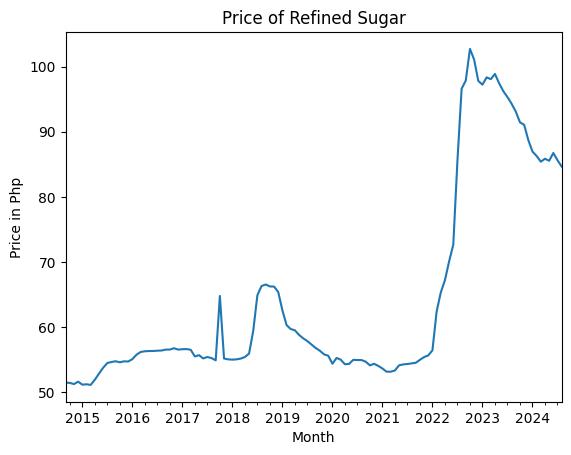

In [219]:
price.plot(title='Price of Refined Sugar', ylabel='Price in Php')

<Axes: title={'center': 'Trend Component'}, xlabel='Month'>

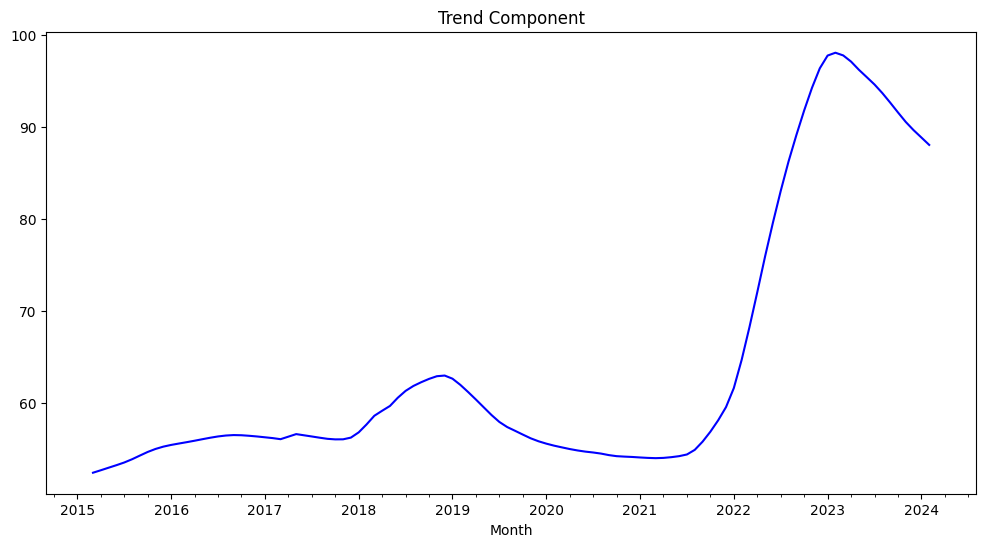

In [220]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(price, model='additive', period=12);

# Plot the decomposed components
# decomposition.plot();

# Plot the trend component
trend = decomposition.trend
trend.plot(title='Trend Component', figsize=(12, 6), color='blue')

P-value: 0.0000 < 0.05
The time series is stationary


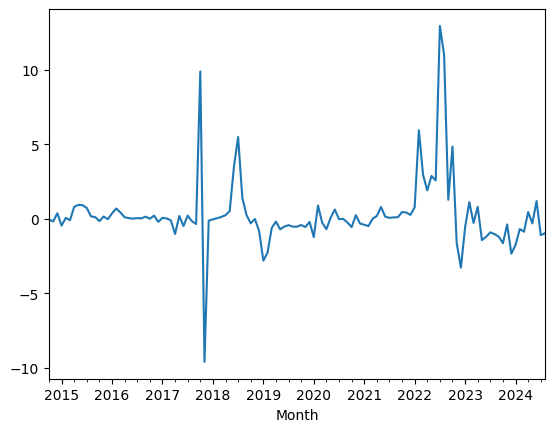

In [221]:
Differencing(price, 1)

In [222]:
price_train, price_test = train_test_split(price, 24)

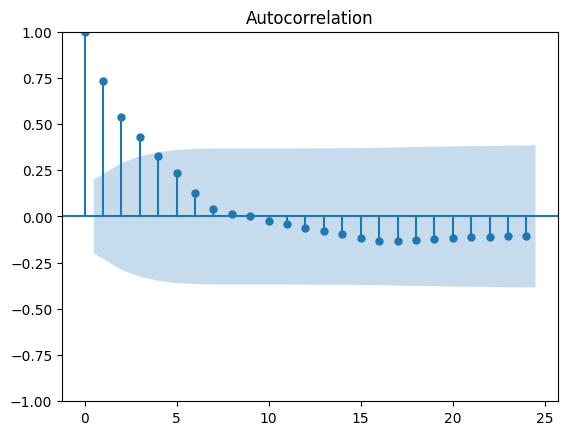

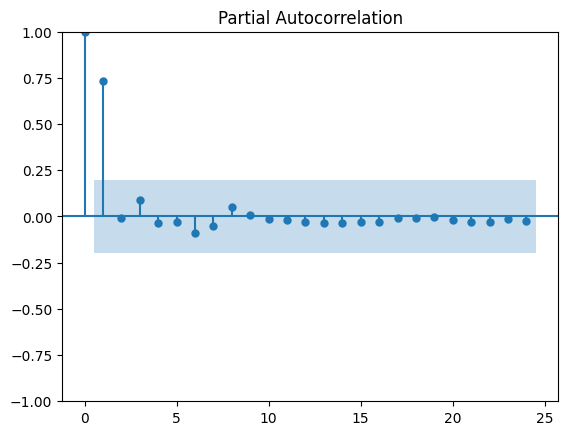

In [223]:
ACF_PACF(price_train, lags=24)

In [224]:
p = [0,1] # AR
d = [1]   # I
q = [0,1,2,3] # MA

a,b,c,d = Eval_possible_models(price_train, price_test, p,d,q)
a

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
0,ARIMA,"(0, 1, 0)",47.165733,6.867731,5.488333,6.180969,448.669839,451.223716
1,ARIMA,"(0, 1, 1)",64.864335,8.053840,6.288555,7.125132,444.684156,449.791910
2,ARIMA,"(0, 1, 2)",145.338765,12.055653,10.573663,11.827591,442.518661,450.180292
3,ARIMA,"(0, 1, 3)",203.995696,14.282706,12.976780,14.436747,443.184824,453.400331
4,ARIMA,"(1, 1, 0)",115.353579,10.740278,9.130338,10.256450,442.101393,447.209147
5,ARIMA,"(1, 1, 1)",6071.974805,77.922877,68.643196,76.644387,434.260272,441.921902
6,ARIMA,"(1, 1, 2)",7562.219883,86.961025,76.915176,85.823385,435.457356,445.672864
7,ARIMA,"(1, 1, 3)",7714.234864,87.830717,77.909064,86.887233,437.200272,449.969657


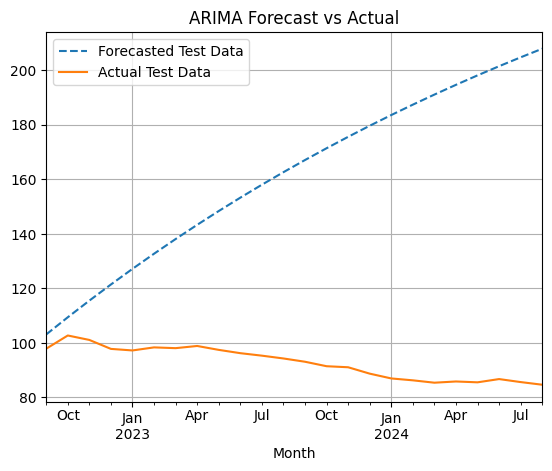

Evaluation of ARIMA(1, 1, 1)
MSE: 6071.9748
MAE: 68.6432
RMSE: 77.9229
MAPE: 76.64%
AIC: 434.26
BIC: 441.92


In [225]:
model,pred = Model(price_train, price_test, (1,1,1))
Evaluate(price_train, price_test, (1,1,1))

In [226]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -214.130
Date:                Sun, 11 May 2025   AIC                            434.260
Time:                        20:16:30   BIC                            441.922
Sample:                    09-01-2014   HQIC                           437.356
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9691      0.087     11.085      0.000       0.798       1.140
ma.L1         -0.6984      0.122     -5.717      0.000      -0.938      -0.459
sigma2         5.2456      0.367     14.299      0.000       4.527       5.965
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):               971.46
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):              41.72   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# I. Forecasting of Exogeneous Variables

The forecasting of exogeneous variable is done using ARIMA 

Note: Some of the evaluation metric for exogeneous variable is bit higher

In [227]:
forecast_df = pd.read_csv('combined_forecast.csv')
forecast_df.set_index('Month', inplace=True)

x1 = forecast_df['Production']
x2 = forecast_df['Withdrawals']
x3 = forecast_df['GlobalPrice']
x4 = forecast_df['ExchangeRate']
x6 = forecast_df['Precipitation']
x5 = forecast_df['Temperature']
x7 = forecast_df['Inflation']


In [228]:
# Set up the Variables
y = price 
exog = pd.concat([production, withdrawals, exchangeRate,temperature, precipitation ,inflation], axis=1)
future_exog = pd.concat([x1, x2, x4,x5, x6,x7], axis=1)

In [229]:
future_exog.head()

,Production,Withdrawals,ExchangeRate,Temperature,Precipitation,Inflation
Month,,,,,,
2024-09-01,8.279881e+05,1.507974e+06,56.841096,29.466849,285.637000,2.447271
2024-10-01,1.294413e+06,1.266047e+06,56.917426,29.344605,339.789373,2.428273
2024-11-01,1.725326e+06,1.356426e+06,56.774533,29.324753,195.308816,2.277768
2024-12-01,2.145409e+06,1.492143e+06,56.819952,28.886634,85.197601,2.403436
2025-01-01,2.406342e+06,1.242556e+06,56.846766,29.402591,78.719900,2.414717


The Forecasted value for the exegeneous variables are from September 2024 to August 2027

# II. ARIMAX model

The main variable we want to forecast is the Price, thus the price is the dependent variable. 

In [230]:
ADF_test(y)

P-value: 0.6640 < 0.05
The time series is not stationary


P-value: 0.0000 < 0.05
The time series is stationary


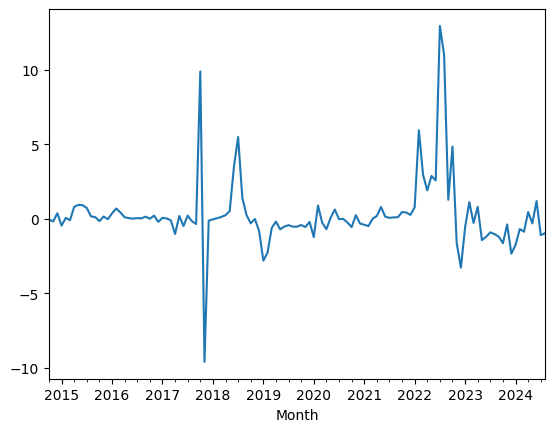

In [231]:
Differencing(y, 1)

the **I** component is 1

### Train test split

The total number of data points is 120. 80% of the data will be used for training and the remaining 20% is for testing. 20% of 120 = 24 

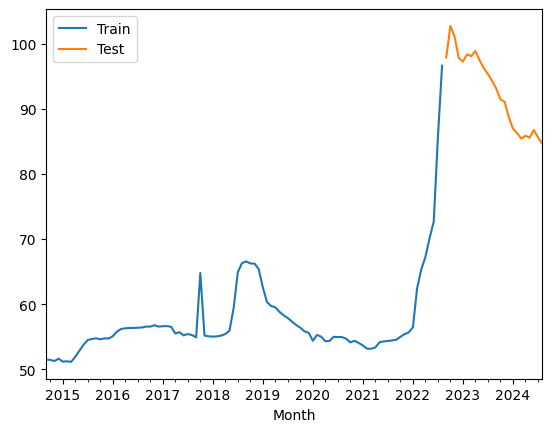

In [232]:
split = 24
y_train, y_test = train_test_split(y, split)
exog_train, exog_test = train_test_split(exog, split)

y_train.plot()
y_test.plot()
plt.legend(['Train', 'Test'])

In [233]:
diff_y_train = y_train.diff().dropna()

In [234]:
q = get_significant_acf(diff_y_train)
p = get_significant_pacf(diff_y_train)

print(f'ACF: {q} \nPACF: {p}')

ACF: [1] 
PACF: [1]


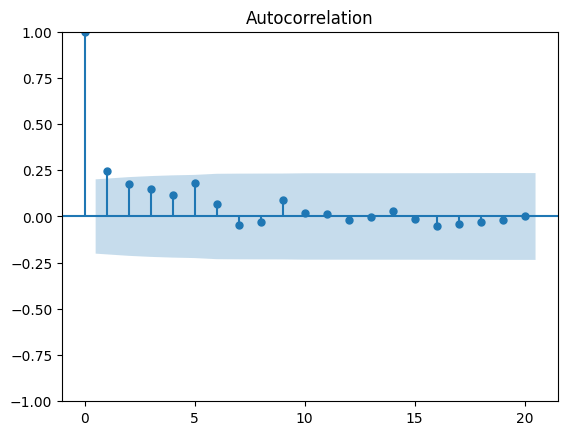

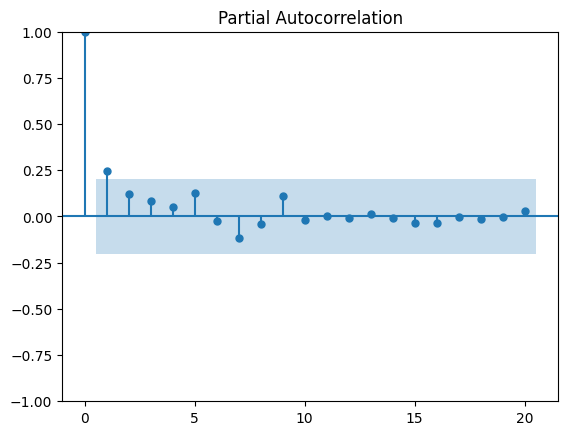

In [235]:
ACF_PACF(diff_y_train, lags=20)

### ACF and PACF

The ACF helps to identify the **MA** or **q** component.

The PACF helps to identify the **AR** or **p** component.

In [236]:
# Evaluate other parameters
p = [0,1]
d = [0,1]
q = [0,1]

all, mape,aic, bic = Eval_possible_models(y_train, y_test, p, d, q, exog_train, exog_test)
all

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
0,ARIMAX,"(0, 0, 0)",584.990415,24.186575,23.766264,25.437670,918.298347,936.248784
1,ARIMAX,"(0, 0, 1)",569.140191,23.856659,23.390959,25.054158,540.140026,560.654811
2,ARIMAX,"(0, 1, 0)",43.542223,6.598653,4.952506,5.620202,776.551666,794.428804
3,ARIMAX,"(0, 1, 1)",53.848296,7.338140,5.633424,6.384523,438.716129,459.147144
4,ARIMAX,"(1, 0, 0)",17.404374,4.171855,3.563097,3.763963,482.170608,502.685393
5,ARIMAX,"(1, 0, 1)",609.633621,24.690760,24.188771,25.873154,805.038140,828.117274
6,ARIMAX,"(1, 1, 0)",68.501556,8.276567,6.571082,7.419236,438.245351,458.676366
7,ARIMAX,"(1, 1, 1)",43.542223,6.598653,4.952506,5.620202,442.033507,465.018399


Based on the different ARIMAX model in the table.

ARIMAX (1,1,2) has the lowest AIC

ARIMAX (1,1,0) has the lowest BIC

But among those the model with the lowest MAPE and relatively low AIC and BIC is the ARIMAX (1,1,1)

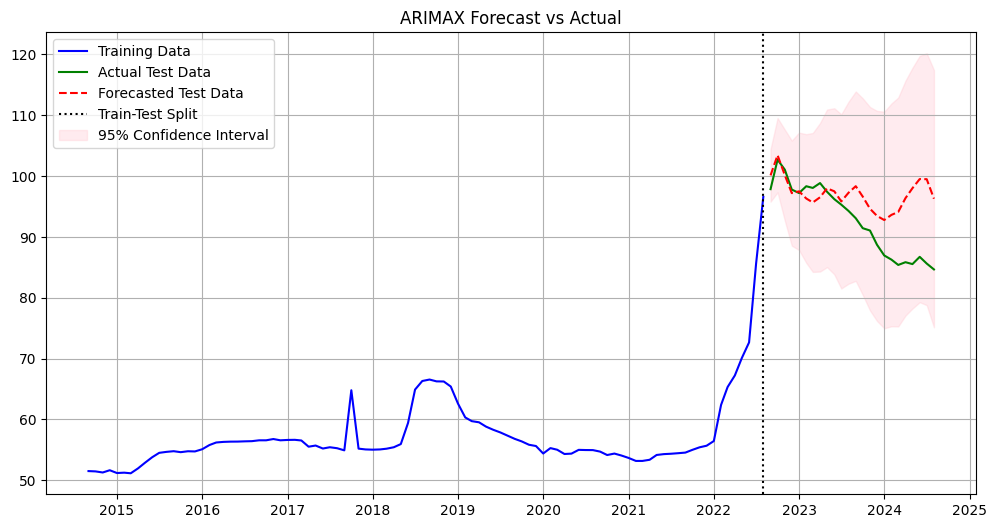

In [237]:
order = (1,1,1)
model, pred = Model(y_train,y_test, order, exog_train, exog_test) 

In [238]:
confidence= model.get_forecast(steps=24, exog=exog_test).conf_int()
difference = y_test - pred
test_results = pd.DataFrame({'Test': y_test, 'Pred': pred,'Difference': difference ,'Lower': confidence.iloc[:, 0], 'Upper': confidence.iloc[:, 1]})
test_results.head(24)

,Test,Pred,Difference,Lower,Upper
2022-09-01,97.86,100.123192,-2.263192,95.806748,104.439636
2022-10-01,102.70,103.446708,-0.746708,97.342335,109.551082
2022-11-01,101.07,100.171642,0.898358,92.695342,107.647942
2022-12-01,97.79,97.203965,0.586035,88.571078,105.836853
2023-01-01,97.22,97.498777,-0.278777,87.846916,107.150639
2023-02-01,98.34,96.320618,2.019382,85.747533,106.893703
2023-03-01,98.06,95.671843,2.388157,84.251606,107.092080
2023-04-01,98.86,96.523911,2.336089,84.315164,108.732658
2023-05-01,97.43,97.993605,-0.563605,85.044274,110.942937
2023-06-01,96.22,97.509072,-1.289072,83.859278,111.158866


<Axes: xlabel='Month'>

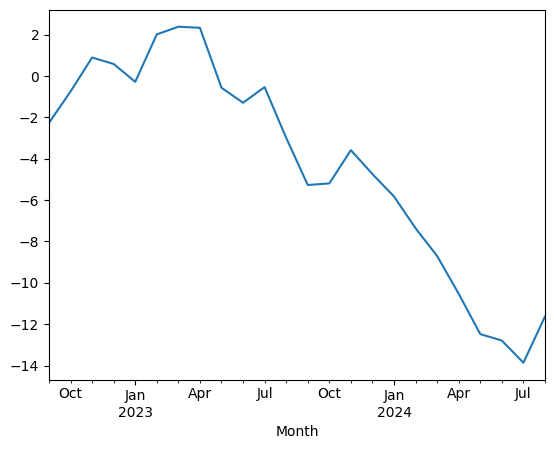

In [239]:
difference.plot()

,lb_stat,lb_pvalue
1,0.395061,0.529651
2,0.411344,0.814100
3,0.416359,0.936843
4,0.424162,0.980451
5,0.475717,0.992985
6,0.962501,0.986994
7,1.100140,0.993047
8,1.104231,0.997500
9,1.353656,0.998094
10,1.359806,0.999310


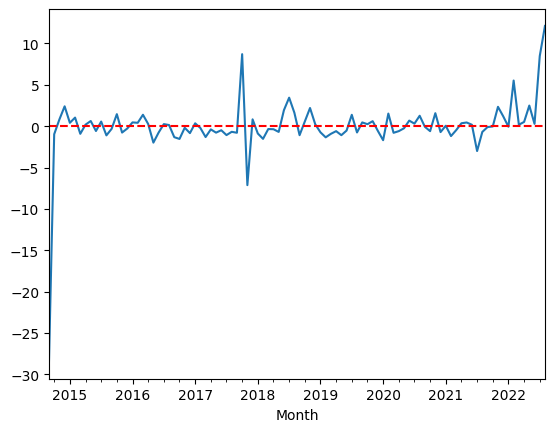

In [240]:
resid = Residuals(model)
LjungBox(resid, lags=[1,2,3,4,5,6,7,8,9,10,11,12]) # 0.05

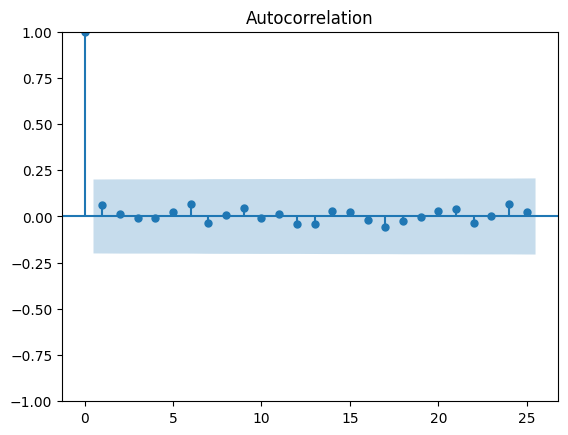

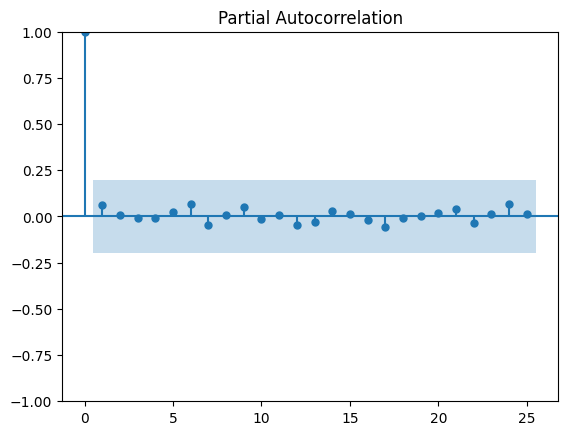

In [241]:
ACF_PACF(resid,25)

In [242]:
# Evaluate the model

Evaluate(y_train, y_test, order, exog_train, exog_test)

Evaluation of ARIMAX(1, 1, 1)
MSE: 43.5422
MAE: 4.9525
RMSE: 6.5987
MAPE: 5.62%
AIC: 442.03
BIC: 465.02


My Evaluation:

7% MAPE is OK

MAPE < 10% is good


In [243]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   96
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -212.017
Date:                Sun, 11 May 2025   AIC                            442.034
Time:                        20:16:33   BIC                            465.018
Sample:                    09-01-2014   HQIC                           451.321
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Production    -1.923e-07   9.49e-07     -0.203      0.839   -2.05e-06    1.67e-06
Withdrawals    2.274e-07   1.01e-06      0.226      0.821   -1.74e-06     2.2e-06
ExchangeRate      1.4998      0.400      3.749      0.000       0.716       2.284
TempMax           0.3084      0.461      0.670      0.503      -0.594       1.211
Precipitation     0.0042      0.003      1.332      0.183      -0.002       0.010
Inflation         0.8009      0.981      0.817      0.414      -1.121       2.723
ar.L1                  0      0.070          0      1.000      -0.137       0.137
ma.L1                 -0      0.070         -0      1.000      -0.137       0.137
sigma2            4.8502      0.545      8.892      0.000       3.781       5.919
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               577.38
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               9.80   Skew:                             2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.82e+18. Standard errors may be unstable.
"""

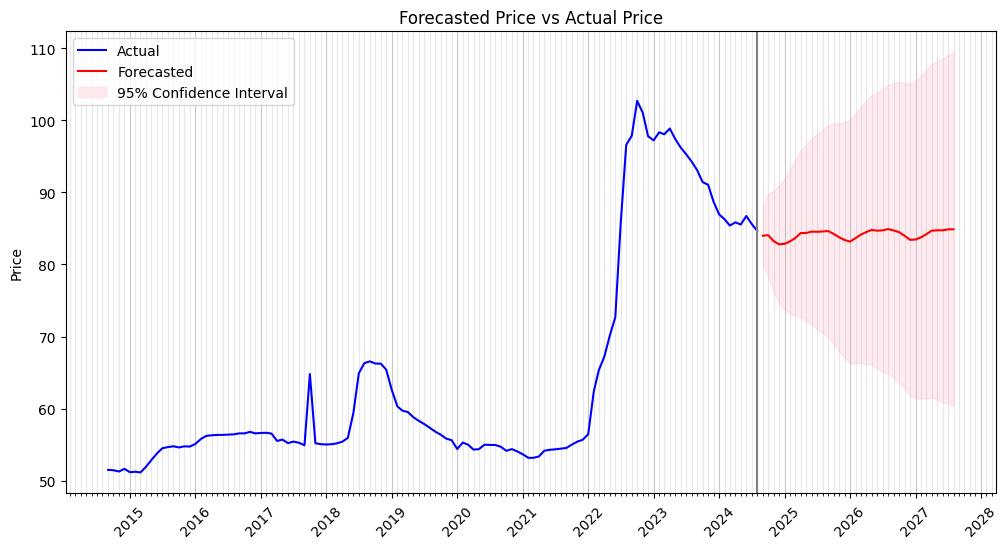

In [244]:
forecast, model = Forecast(y, order, 36, exog, future_exog)
confidence = model.get_forecast(steps=36, exog=future_exog).conf_int()

Forecasted_plot(y, forecast, confidence.values)

In [245]:
combined_price = pd.concat([forecast, confidence], axis=1)
combined_price.columns = ['Forecast','Low', 'High' ]
combined_price

,Forecast,Low,High
2024-09-01,83.993000,79.903923,88.082077
2024-10-01,84.067597,78.284769,89.850425
2024-11-01,83.231950,76.149462,90.314439
2024-12-01,82.799648,74.621495,90.977802
2025-01-01,82.864764,73.721310,92.008218
2025-02-01,83.221328,73.205176,93.237480
2025-03-01,83.665879,72.847198,94.484559
2025-04-01,84.370709,72.805053,95.936365
2025-05-01,84.375035,72.107804,96.642266
2025-06-01,84.556634,71.625838,97.487431


In [246]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  120
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -258.110
Date:                Sun, 11 May 2025   AIC                            534.220
Time:                        20:16:34   BIC                            559.232
Sample:                    09-01-2014   HQIC                           544.377
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Production    -1.509e-07   7.51e-07     -0.201      0.841   -1.62e-06    1.32e-06
Withdrawals    3.655e-07   8.56e-07      0.427      0.670   -1.31e-06    2.04e-06
ExchangeRate      1.1888      0.331      3.596      0.000       0.541       1.837
TempMax           0.3490      0.379      0.922      0.357      -0.393       1.091
Precipitation     0.0037      0.002      1.716      0.086      -0.001       0.008
Inflation         0.6579      0.726      0.907      0.365      -0.764       2.080
ar.L1                  0      0.047          0      1.000      -0.092       0.092
ma.L1                 -0      0.047         -0      1.000      -0.092       0.092
sigma2            4.3527      0.399     10.903      0.000       3.570       5.135
===================================================================================
Ljung-Box (L1) (Q):                   1.82   Jarque-Bera (JB):               936.59
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                             2.51
Prob(H) (two-sided):                  0.02   Kurtosis:                        15.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+23. Standard errors may be unstable.
"""

In [247]:
forecast_df = pd.DataFrame(forecast, columns=['Forecast'])
forecast_df.head(36)

,Forecast
2024-09-01,83.993000
2024-10-01,84.067597
2024-11-01,83.231950
2024-12-01,82.799648
2025-01-01,82.864764
2025-02-01,83.221328
2025-03-01,83.665879
2025-04-01,84.370709
2025-05-01,84.375035
2025-06-01,84.556634


In [248]:
latest_actual_price = [84, 83.15,83.13, 82.83, 83.65, 83.07, 83.14, 83.49] # retrieved from department of Agriculture price monitoring
forecasted_price = forecast.head(8).values.tolist()


from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse

mape_value = mape(latest_actual_price, forecasted_price) * 100
mae_value = mae(latest_actual_price, forecasted_price)
rmse_value = rmse(latest_actual_price, forecasted_price)
print(f'MAPE: {mape_value:.2f}%')
print(f'MAE: {mae_value:.2f}')
print(f'RMSE: {rmse_value:.2f}')


MAPE: 0.51%
MAE: 0.43
RMSE: 0.56


In [249]:
# show the mini-max values
min_price = min(forecast_df['Forecast'])
max_price = max(forecast_df['Forecast'])
print(f'Minimum Forecasted Price: {min_price:.2f}')
print(f'Maximum Forecasted Price: {max_price:.2f}')


Minimum Forecasted Price: 82.80
Maximum Forecasted Price: 84.92
